In [1]:
from KGS import *

# Suseptibility Raw data

In [2]:
Ag_sus = pd.read_csv('SQUID_Uterecht_data/20240222_NCCO_AG.dat', header=20, na_values=[''])
UBC_sus = pd.read_csv('SQUID_Uterecht_data/20240223_NCCO_SC_Canada4_full_size.dat', header=20, na_values=[''])
KU_sus = pd.read_csv('SQUID_Uterecht_data/20240226_NCCO_P_Copenhagen_annealed.dat', header=20, na_values=[''])

print(UBC_sus)

             Time  Comment  Field (Oe)  Temperature (K)  Long Moment (emu)  \
0    1.708724e+09      NaN        10.0         1.800814          -0.211449   
1    1.708724e+09      NaN        10.0         2.343911          -0.211476   
2    1.708724e+09      NaN        10.0         2.847054          -0.211488   
3    1.708724e+09      NaN        10.0         3.168666          -0.211482   
4    1.708724e+09      NaN        10.0         3.758556          -0.211477   
..            ...      ...         ...              ...                ...   
189  1.708770e+09      NaN        10.0        47.993290           0.001147   
190  1.708770e+09      NaN        10.0        48.502520           0.001138   
191  1.708770e+09      NaN        10.0        48.998110           0.001131   
192  1.708770e+09      NaN        10.0        49.503940           0.001123   
193  1.708770e+09      NaN        10.0        50.006730           0.001116   

     Long Scan Std Dev  Long Algorithm  Long Reg Fit  Long Perc

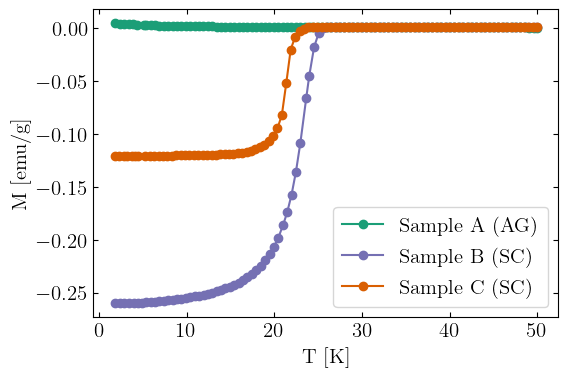

In [3]:
plt.figure(figsize=(6, 4))

plt.plot(Ag_sus['Temperature (K)'].iloc[: len(Ag_sus) // 2], Ag_sus['Long Moment (emu)'].iloc[: len(Ag_sus) // 2]/ 2.5718, label='Sample A (AG)', marker='o')
plt.plot(KU_sus['Temperature (K)'].iloc[: len(KU_sus) // 2], KU_sus['Long Moment (emu)'].iloc[: len(KU_sus) // 2]/0.0337, label='Sample B (SC)',marker='o')
plt.plot(UBC_sus['Temperature (K)'].iloc[: len(UBC_sus) // 2], UBC_sus['Long Moment (emu)'].iloc[: len(UBC_sus) // 2]/1.7521, label='Sample C (SC)',marker='o')
plt.xlabel('T [K]')
plt.ylabel('M [emu/g]')
plt.legend()
